In [15]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [248]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
m = 1.
c = 1.
theta_e = 10.
#nu_c = 1
B = 10.
e = 1


#constants in Gaussian cgs units (values from harmony)
#m = 9.1e-28
#c = 3e10
#theta_e = 5.8e10
#nu_c = 8.4e7
#nu = 5e7


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)


theta = np.pi/3.
epsilon = 0.01
n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
nu = 1000000. * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
n_dn = (nu / nu_c) * abs(np.sin(theta))
C = 10.
kappa = 10.
n_peak = 100000000


#cos_xi = np.arange(-1., 1., 2./100)
#cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#gamma = np.arange(1, 11, 0.1)

#def delta_function(n, gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#    argument = (n * nu_c)/gamma - nu * (1 - beta * cos_xi * np.cos(theta))
#    f = (1/(epsilon * np.sqrt(np.pi))) * np.exp(-argument**2./epsilon**2.)
#    return f



#beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)


#def n_up(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    ans = 10.* (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.)) * (nu/nu_c) * (1. - beta**2 * (np.cos(theta))**2)
#    return ans
    
    
def K_s(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

def kappa_main(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    prefactor_MJ  = 1. / (m**3 * c**3 * gamma**2 * beta)
#    thermal_dist_prefactor = n_e / (4. * np.pi * theta_e)
#    thermal_dist_exp = np.exp(- gamma/theta_e)
#    thermal_dist_body = gamma * np.sqrt(gamma**2 - 1.)/special.kn(2., 1./theta_e)
#    thermal_dist = thermal_dist_prefactor * thermal_dist_body * thermal_dist_exp
#
    kappa_body = (1. + (np.sqrt(1. + m**2 * c**2 * (gamma**2 - 1.)) - 1.) / (kappa * theta_e)) ** (- kappa - 1.)
    
    return kappa_body

def norm_term(gamma):
    norm_t = 4. * np.pi * m**3. * c **3. * gamma * np.sqrt(gamma**2 - 1.) * kappa_main(gamma)
    return norm_t

def norm_kappa():
    ans = quad(norm_term, 1. ,np.inf)[0]
    return ans


norm_kappa_value = norm_kappa()
#print norm_kappa_value

def kappa_f(gamma):
    f = (1./norm_kappa_value) * kappa_main(gamma)
    return f


#def kappa_with_norm(gamma):
    
#    def norm_of_kappa(gamma):
        
#        norm_term = 4. * np.pi * m**3. * c **3. * gamma * np.sqrt(gamma**2 - 1.) * kappa_main(gamma)
#        return norm_term
    
#    norm = quad(norm_of_kappa, 1., np.inf)[0]
        
#    kappa_dist = (1./norm) * kappa_main(gamma)
    
#    return kappa_dist
    
    
#def jnu_integrand_in_eq60(cos_xi, gamma, n):
#    beta = np.sqrt(1. - 1./gamma**2.) 
    
#    prefactor_Jnu = 2. * np.pi * e**2 * nu**2 / c
    
#    d_3_p = m**3 * c**3 * gamma**2 * beta * 2 * np.pi
    
#    I = prefactor_Jnu * MJ_f(gamma) * d_3_p * K_s(n, gamma, cos_xi)
    
#    f = delta_function(n, gamma, cos_xi) * I


#   change the order of integral, which means integral over gamma first, then sum over n

def I_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_Jnu = 2. * np.pi * e**2 * nu**2 / c
    d_3_p = m**3 * c**3 * gamma**2 * beta * 2 * np.pi
    
    ans = prefactor_Jnu * kappa_f(gamma) * d_3_p * K_s(n, gamma)
    
    return ans

def gamma_up_limit(n):
    gamma_up_nume = (n * nu_c /nu) + np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_up = gamma_up_nume / gamma_deno
    return gamma_up

def gamma_dn_limit(n):
    gamma_dn_nume = (n * nu_c /nu) - np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_dn = gamma_dn_nume / gamma_deno
    return gamma_dn
    
    
def jnu_integrand_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_62 = 1. / (nu * beta * np.absolute(np.cos(theta)))
    
    f = prefactor_62 * I_in_eq62(gamma, n)
    
    return f

def jnu_n_integral_62_one(n):
    
    def jnu_integrand_in_eq62_gamma(gamma):
        jnu_integrand_62 = jnu_integrand_in_eq62(gamma, n)
        return jnu_integrand_62
    
    ans_once = quad(jnu_integrand_in_eq62_gamma, gamma_dn_limit(n), gamma_up_limit(n))[0]
    
    return ans_once


def jnu_62_integral_from_n_max_to_n_limit(n_max, n_dn):
    
    if(n_max < n_dn):
        n_max = n_dn
    
    ans = quad(jnu_n_integral_62_one, n_max, C * n_peak)[0]
    
    return ans
    

def jnu_62_sum_to_n_max_integral_to_n_limit(n_max_sum):
    ans = 0
    for i in range(int(n_dn + 1.), int(1 + n_dn + n_max_sum)):
        ans = ans + jnu_n_integral_62_one(i)
#        print ans
        
    total = ans + jnu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)
    return total
#print  n_dn


In [249]:
n_max = 30
print jnu_62_sum_to_n_max_integral_to_n_limit(n_max)

8.61715008704e-07


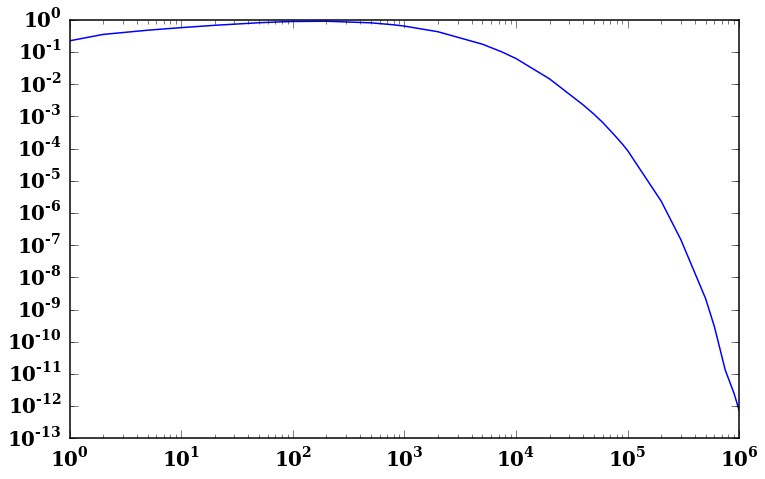

In [179]:
data = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/kappa_150_dist_with_arbitrary_n_peak.txt')
pl.loglog(data[:,0], data[:,1])

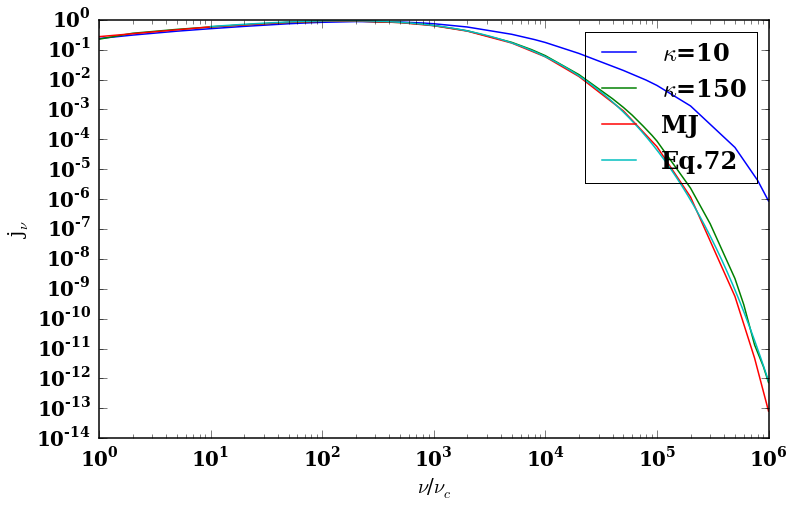

In [257]:
def jnu_72(x):
    jnu_72_prefactor = n_e * np.sqrt(2) * np.pi * e**2 * nu_s / (3. * special.kn(2., 1./theta_e) * c)
    jnu_72_body = (np.sqrt(x/nu_s) + 2.**(11./12.) * (x/nu_s)**(1./6.))**2
    jnu_72_exp = np.exp(- (x/nu_s)**(1./3.))
    jnu_approximation_72 = jnu_72_prefactor * jnu_72_body * jnu_72_exp
    
    return jnu_approximation_72

x = np.arange(10*nu_c, 1000000*nu_c, 1)
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("j$_\\nu$")

data1 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/kappa_150_dist_with_arbitrary_n_peak.txt')
data2 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/data_with_geo_average_thermal.txt')
data3 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/kappa_10_dist_with_arbitrary_n_peak.txt')

pl.loglog(data3[:, 0], data3[:, 1], label = '$\\kappa$=10')
pl.loglog(data1[:, 0], data1[:, 1], label = '$\\kappa$=150')
pl.loglog(data2[:, 0], data2[:, 1], label = 'MJ')
pl.loglog(x/nu_c, jnu_72(x), label = 'Eq.72')

pl.legend()
pl.show()


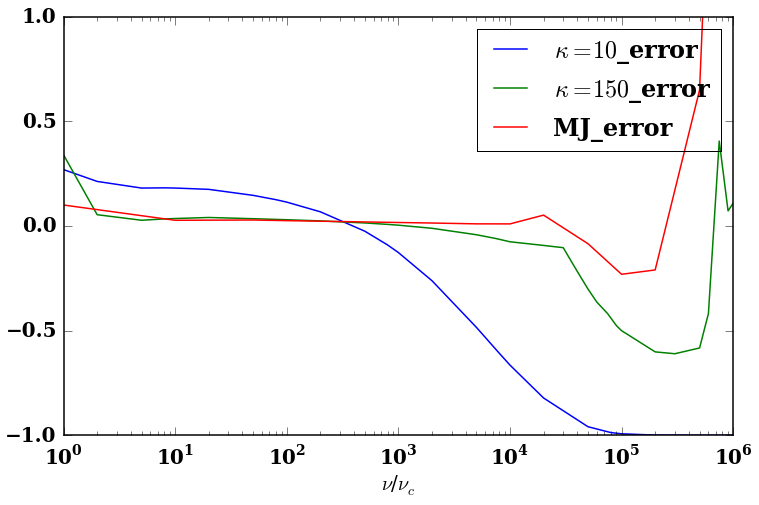

In [258]:
data1 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/kappa_150_dist_with_arbitrary_n_peak.txt')
data2 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/data_with_geo_average_thermal.txt')
data3 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/kappa_10_dist_with_arbitrary_n_peak.txt')




def error_thermal_with_eq72_kappa_150():
    
    data_x = data1[:, 0]
    
    ans = jnu_72(data_x * nu_c)
    
    error = ans / data1[:, 1] - 1.
    
    return error

def error_thermal_with_eq72_kappa_10():
    
    data_x = data3[:, 0]
    
    ans = jnu_72(data_x * nu_c)
    
    error = ans / data3[:, 1] - 1.
    
    return error
    
def error_thermal_with_eq72_thermal():
    
    data_x = data2[:, 0]
    
    ans = jnu_72(data_x * nu_c)
    
    error = ans / data2[:, 1] - 1.
    
    return error 

pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$")


pl.semilogx(data3[:, 0], error_thermal_with_eq72_kappa_10(), label = '$\\kappa=10$_error')
pl.semilogx(data1[:, 0], error_thermal_with_eq72_kappa_150(), label = '$\\kappa=150$_error')
pl.semilogx(data2[:, 0], error_thermal_with_eq72_thermal(), label = 'MJ_error')
pl.ylim([-1,1])
pl.legend()
pl.show()

    